In [2]:
# loading the neccessary packages
import os
import numpy as np
import pandas as pd
import cv2 as cv
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import joblib
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_curve,auc,classification_report
from sklearn.metrics import roc_auc_score,roc_curve
import copy
import warnings
warnings.filterwarnings("ignore")

In [10]:
# creaing np.arrays by knowing the count of files of photo i have
age=np.zeros((9780,1))
gender=np.zeros((9780,1))

In [11]:
# getting age and gender which is available in filename
path="G:/complete data science/UTK datasets/crop_part1/"
count=0
for entry in os.listdir(path):
    age[count]=entry.split("_")[0]
    gender[count]=entry.split("_")[1]
    count+=1
count   

9779

In [12]:
hello=np.column_stack((age,gender))
hello

array([[100.,   1.],
       [100.,   1.],
       [101.,   1.],
       ...,
       [  9.,   1.],
       [  9.,   1.],
       [  0.,   0.]])

In [13]:
len(hello)

9780

In [14]:
# horizontal stacking for creating a dataframe
data=np.hstack((age,gender))
len(data)

9780

In [15]:
data

array([[100.,   1.],
       [100.,   1.],
       [101.,   1.],
       ...,
       [  9.,   1.],
       [  9.,   1.],
       [  0.,   0.]])

In [16]:
df=pd.DataFrame(data,columns=["age","gender"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9780 entries, 0 to 9779
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     9780 non-null   float64
 1   gender  9780 non-null   float64
dtypes: float64(2)
memory usage: 152.9 KB


In [17]:
df["gender"].value_counts()

1.0    5406
0.0    4373
3.0       1
Name: gender, dtype: int64

In [18]:
# to cluster them into 5 groups other wise it has 100 diiferent ages which asks huge volume data instead ,we have only
# 9780 datas 
def changing_age(i):
    i = int(i)
    if i < 20:
        return 0
    elif (i>=20) and (i<40):
        return 1
    elif (i>=40) and (i<60):
        return 2
    elif (i>=60) and (i<80):
        return 3
    elif (i>=80) and (i<100):
        return 4
    else:
        return 5 

In [19]:
# making new columns
df["norm_age"]=df["age"].apply(changing_age)

In [20]:
df.gender.value_counts()

1.0    5406
0.0    4373
3.0       1
Name: gender, dtype: int64

In [21]:
# getting the image as one dimensional array ,here 9780 is nothing but the len(images) that we have in file folder 
arr=np.zeros((9780,32*32))
# sample to see how it would be?
arr[0]

array([0., 0., 0., ..., 0., 0., 0.])

In [33]:
count=0
for entry in os.listdir(path):
#     print(path+entry)
    img=cv.imread(path+entry)
    gray=cv.cvtColor(img,cv.COLOR_BGR2GRAY)
    gray=cv.resize(gray,(32,32))
    
#     print(gray)
    arr[count]=gray.reshape(1,32*32)
#     print(gray.shape)
    count+=1

In [34]:
# normalize data to avoid skew in the datasets
arr = arr.astype('float32')
arr /= 255
arr

array([[0.9137255 , 0.45490196, 0.36078432, ..., 0.03137255, 0.12156863,
        0.27450982],
       [0.14117648, 0.13333334, 0.13725491, ..., 0.2627451 , 0.29803923,
        0.29803923],
       [0.8745098 , 0.88235295, 0.8745098 , ..., 0.3019608 , 0.25882354,
        0.22745098],
       ...,
       [0.8235294 , 0.78039217, 0.36078432, ..., 0.7411765 , 0.78431374,
        0.01568628],
       [0.03137255, 0.03529412, 0.05490196, ..., 0.14901961, 0.12941177,
        0.14901961],
       [0.72156864, 0.43529412, 0.25490198, ..., 0.06666667, 0.0627451 ,
        0.08627451]], dtype=float32)

In [36]:
# making dataframe 
df1=pd.DataFrame(arr)
df1

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,0.913725,0.454902,0.360784,0.619608,0.956863,0.913725,0.874510,0.933333,0.890196,0.905882,...,0.223529,0.164706,0.082353,0.066667,0.039216,0.015686,0.023529,0.031373,0.121569,0.274510
1,0.141176,0.133333,0.137255,0.105882,0.086275,0.164706,0.219608,0.266667,0.349020,0.403922,...,0.282353,0.117647,0.125490,0.172549,0.211765,0.262745,0.254902,0.262745,0.298039,0.298039
2,0.874510,0.882353,0.874510,0.803922,0.392157,0.796078,0.921569,0.945098,0.917647,0.858824,...,0.619608,0.709804,0.596078,0.627451,0.666667,0.654902,0.243137,0.301961,0.258824,0.227451
3,0.313726,0.278431,0.180392,0.196078,0.227451,0.250980,0.423529,0.454902,0.392157,0.313726,...,0.639216,0.658824,0.682353,0.713726,0.729412,0.733333,0.752941,0.709804,0.619608,0.235294
4,0.262745,0.207843,0.286275,0.509804,0.639216,0.666667,0.682353,0.713726,0.737255,0.752941,...,0.749020,0.721569,0.298039,0.203922,0.294118,0.101961,0.235294,0.411765,0.827451,0.690196
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9775,0.996078,0.992157,0.988235,0.466667,0.301961,0.223529,0.627451,0.698039,0.737255,0.768627,...,0.329412,0.160784,0.196078,0.207843,0.215686,0.215686,0.196078,0.164706,0.164706,0.129412
9776,0.000000,0.003922,0.019608,0.015686,0.015686,0.003922,0.007843,0.043137,0.176471,0.274510,...,0.725490,0.490196,0.050980,0.011765,0.007843,0.023529,0.062745,0.035294,0.023529,0.015686
9777,0.823529,0.780392,0.360784,0.431373,0.439216,0.600000,0.749020,0.788235,0.807843,0.807843,...,0.654902,0.435294,0.235294,0.709804,0.698039,0.760784,0.760784,0.741176,0.784314,0.015686
9778,0.031373,0.035294,0.054902,0.160784,0.298039,0.372549,0.486275,0.580392,0.658824,0.721569,...,0.666667,0.705882,0.666667,0.584314,0.513726,0.380392,0.164706,0.149020,0.129412,0.149020


In [ ]:
# IT TOOK SOME TIME GET ALL THE PIC AND CONVERT TO ARR(LIST) ,THEN TO DATAFRAME..
# SO I SAVED IT AS CSV FILES

# DATAFRAME

In [22]:
final_data=pd.read_csv("G:/csv_files/UTK_DATASETS_project.csv")
final_data

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,0.913725,0.454902,0.360784,0.619608,0.956863,0.913725,0.874510,0.933333,0.890196,0.905882,...,0.223529,0.164706,0.082353,0.066667,0.039216,0.015686,0.023529,0.031373,0.121569,0.274510
1,0.141176,0.133333,0.137255,0.105882,0.086275,0.164706,0.219608,0.266667,0.349020,0.403922,...,0.282353,0.117647,0.125490,0.172549,0.211765,0.262745,0.254902,0.262745,0.298039,0.298039
2,0.874510,0.882353,0.874510,0.803922,0.392157,0.796078,0.921569,0.945098,0.917647,0.858824,...,0.619608,0.709804,0.596078,0.627451,0.666667,0.654902,0.243137,0.301961,0.258824,0.227451
3,0.313725,0.278431,0.180392,0.196078,0.227451,0.250980,0.423529,0.454902,0.392157,0.313725,...,0.639216,0.658824,0.682353,0.713726,0.729412,0.733333,0.752941,0.709804,0.619608,0.235294
4,0.262745,0.207843,0.286275,0.509804,0.639216,0.666667,0.682353,0.713726,0.737255,0.752941,...,0.749020,0.721569,0.298039,0.203922,0.294118,0.101961,0.235294,0.411765,0.827451,0.690196
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9775,0.996078,0.992157,0.988235,0.466667,0.301961,0.223529,0.627451,0.698039,0.737255,0.768627,...,0.329412,0.160784,0.196078,0.207843,0.215686,0.215686,0.196078,0.164706,0.164706,0.129412
9776,0.000000,0.003922,0.019608,0.015686,0.015686,0.003922,0.007843,0.043137,0.176471,0.274510,...,0.725490,0.490196,0.050980,0.011765,0.007843,0.023529,0.062745,0.035294,0.023529,0.015686
9777,0.823529,0.780392,0.360784,0.431373,0.439216,0.600000,0.749020,0.788235,0.807843,0.807843,...,0.654902,0.435294,0.235294,0.709804,0.698039,0.760784,0.760784,0.741177,0.784314,0.015686
9778,0.031373,0.035294,0.054902,0.160784,0.298039,0.372549,0.486274,0.580392,0.658824,0.721569,...,0.666667,0.705882,0.666667,0.584314,0.513725,0.380392,0.164706,0.149020,0.129412,0.149020


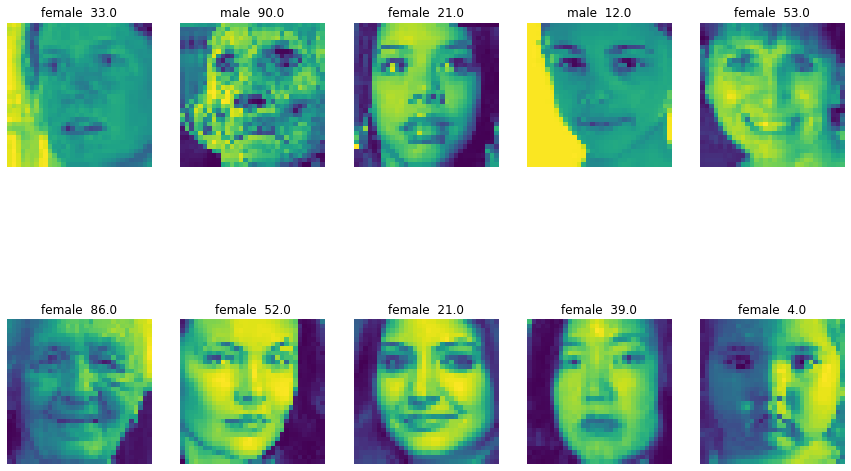

In [73]:
# LET'S SEE SOME IMAGES AND THEIR RESPECTIVE GENDER AND AGE
plt.figure(figsize=(15,10))
j=0
for i in list(df["norm_age"].sample(10).index):
    ax=plt.subplot(2,5,j+1)
    plt.imshow(np.array(final_data.loc[i]).reshape((32,32)))
    plt.axis("off")
    gender="female" if df.iloc[i]["gender"] ==1.0  else "male"
    plt.title(str(gender)+"  "+str(df.iloc[i]["age"]))
    j+=1
plt.show()

# CONSIDERING ONLY  AGE AS TARGET VARIABLE

In [106]:
x=final_data.copy()
y=df["norm_age"].copy()

In [107]:
y.unique()

array([5, 0, 1, 2, 3, 4], dtype=int64)

In [108]:
y.value_counts()

0    4165
1    2551
2    1612
3    1035
4     412
5       5
Name: norm_age, dtype: int64

In [109]:
# AGE 80-100 DATASETS IS VERY LESS DELETING IT
deleting_index=y[y==5].index
deleting_index

Int64Index([0, 1, 2, 143, 144], dtype='int64')

In [110]:
x.drop(deleting_index,inplace=True)

In [112]:
y=y[~(y==5)]

In [114]:
y.value_counts()

0    4165
1    2551
2    1612
3    1035
4     412
Name: norm_age, dtype: int64

In [115]:
print("THE SHAPE OF FEATURES",x.shape)
print("THE SHAPE OF LABEL    ",y.shape)

THE SHAPE OF FEATURES (9775, 1024)
THE SHAPE OF LABEL     (9775,)


In [116]:
# APPENDING THE TARGET VARIABE AND MAKING NEW DATAFRAME
final_df=pd.DataFrame(np.column_stack((x,y)))

In [117]:
final_df[1024].value_counts()

0.0    4165
1.0    2551
2.0    1612
3.0    1035
4.0     412
Name: 1024, dtype: int64

In [118]:
# MAKING BALANCED DATASETS

In [119]:
from imblearn.combine import SMOTETomek
smotetomek=SMOTETomek( sampling_strategy="not majority")
x_sm,y_sm= smotetomek.fit_resample(final_df.drop(1024,axis=1),final_df[1024])

In [120]:
y_sm.value_counts()

4.0    4165
3.0    4164
2.0    4162
0.0    4145
1.0    4143
Name: 1024, dtype: int64

In [121]:
final_df=pd.DataFrame(np.column_stack((x_sm,y_sm)))

In [122]:
# since our feature is huge ,it takes more time in computation ,so reducing our rows
# by taking equal representation of age catogory

In [123]:
final_df=final_df.groupby(1024).sample(2500)

In [124]:
final_df[1024].value_counts()

0.0    2500
1.0    2500
2.0    2500
3.0    2500
4.0    2500
Name: 1024, dtype: int64

In [125]:
final_df.shape

(12500, 1025)

In [126]:
final_df.head()

,0,1,2,3,4,5,6,7,8,9,...,1015,1016,1017,1018,1019,1020,1021,1022,1023,1024
7556,0.407843,0.537255,0.592157,0.447059,0.505882,0.537255,0.572549,0.588235,0.584314,0.533333,...,0.282353,0.270588,0.298039,0.298039,0.286275,0.247059,0.200000,0.180392,0.109804,0.0
418,0.290196,0.117647,0.133333,0.141176,0.141176,0.145098,0.164706,0.192157,0.219608,0.247059,...,0.258824,0.886274,0.972549,0.968627,0.984314,0.960784,0.835294,0.725490,0.529412,0.0
572,0.039216,0.027451,0.074510,0.039216,0.047059,0.152941,0.262745,0.282353,0.290196,0.301961,...,0.235294,0.243137,0.250980,0.254902,0.254902,0.258824,0.258824,0.266667,0.266667,0.0
5410,0.525490,0.529412,0.552941,0.592157,0.635294,0.631373,0.619608,0.615686,0.611765,0.611765,...,0.098039,0.098039,0.121569,0.117647,0.117647,0.121569,0.121569,0.125490,0.133333,0.0
5493,0.058824,0.062745,0.043137,0.019608,0.129412,0.180392,0.172549,0.090196,0.039216,0.035294,...,0.474510,0.478431,0.501961,0.498039,0.521569,0.564706,0.600000,0.635294,0.623529,0.0


In [127]:
x_train,x_test,y_train,y_test=train_test_split(final_df.drop(1024,axis=1),final_df[1024],test_size=0.3,random_state=5,stratify=final_df[1024])

In [128]:
len(x_train),len(x_test)

(8750, 3750)

# MODEL

In [129]:
model_scores={}

# SUPPORT VECTOR MACHINES

In [153]:
model_params={
    "svm":{"model":SVC(gamma='auto',probability=True),
           "params":{"C":[1,10,20],
                       "kernel":["rbf","linear"]}
          }
}

In [155]:
for keyss,valuess in model_params.items():
    clf=GridSearchCV(valuess["model"],valuess["params"],cv=2,n_jobs=-1,scoring="roc_auc_ovr")
    clf.fit(x_train,y_train)


In [156]:
pd.DataFrame(clf.cv_results_,columns=["params","mean_test_score","rank_test_score"]).sort_values("rank_test_score")

,params,mean_test_score,rank_test_score
1,"{'C': 1, 'kernel': 'linear'}",0.933951,1
3,"{'C': 10, 'kernel': 'linear'}",0.930452,2
5,"{'C': 20, 'kernel': 'linear'}",0.929895,3
4,"{'C': 20, 'kernel': 'rbf'}",0.909379,4
2,"{'C': 10, 'kernel': 'rbf'}",0.893770,5
0,"{'C': 1, 'kernel': 'rbf'}",0.819138,6


In [157]:
svm=SVC(C=1,kernel="linear",probability=True)
svm.fit(x_train,y_train)

train_score=cross_val_score(svm,x_train,y_train,scoring="roc_auc_ovr",cv=2).mean()
test_score=roc_auc_score(y_test,svm.predict_proba(x_test), multi_class="ovr")

print("THE TRAINING SCORE FOR C=1,KERNEL= LINEAR :",train_score)
print("THE TESTING SCORE  FOR C=1,KERNEL= LINEAR  :",test_score)

THE TRAINING SCORE FOR C=1,KERNEL= LINEAR : 0.9341339428571428
THE TESTING SCORE  FOR C=1,KERNEL= LINEAR  : 0.9494307555555555


In [158]:
model_scores["SVM"]=(train_score,test_score)

# RANDOM FOREST CLASSIFIER

In [135]:
import sklearn 
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

In [136]:
model_params={
    "randomforest":{"model":RandomForestClassifier(),
           "params":{"n_estimators":[50,100,150,200,250,300],
                       "min_samples_split":[5,10,15,20]}
          }
}

for keyss,valuess in model_params.items():
    clf=GridSearchCV(valuess["model"],valuess["params"],cv=5,n_jobs=-1,scoring="roc_auc_ovr")
    clf.fit(x_train,y_train)


In [137]:
pd.DataFrame(clf.cv_results_,columns=["params","mean_test_score","rank_test_score"]).sort_values("rank_test_score")[:7]

,params,mean_test_score,rank_test_score
4,"{'min_samples_split': 5, 'n_estimators': 250}",0.947201,1
5,"{'min_samples_split': 5, 'n_estimators': 300}",0.947060,2
3,"{'min_samples_split': 5, 'n_estimators': 200}",0.946010,3
2,"{'min_samples_split': 5, 'n_estimators': 150}",0.944895,4
11,"{'min_samples_split': 10, 'n_estimators': 300}",0.943017,5
1,"{'min_samples_split': 5, 'n_estimators': 100}",0.942758,6
10,"{'min_samples_split': 10, 'n_estimators': 250}",0.942463,7


In [140]:
rf1=RandomForestClassifier(n_estimators=300,n_jobs=-1,min_samples_split=5)
rf1.fit(x_train,y_train)

train_score1=cross_val_score(rf1,x_train,y_train,scoring="roc_auc_ovr").mean()
test_score1=roc_auc_score(y_test,rf1.predict_proba(x_test), multi_class="ovr")

print("THE TRAINING SCORE FOR ESTIMATOR=300 :",train_score1)
print("THE TESTING SCORE  FOR ESTIMATOR=300 :",test_score1)
print("\n--------------------------------------------------------------------------")

rf2=RandomForestClassifier(n_estimators=250,n_jobs=-1,min_samples_split=5)
rf2.fit(x_train,y_train)

train_score2=cross_val_score(rf2,x_train,y_train,scoring="roc_auc_ovr").mean()
test_score2=roc_auc_score(y_test,rf2.predict_proba(x_test), multi_class="ovr")
print("THE TRAINING SCORE FOR  ESTIMATOR=250 :",train_score2)
print("THE TESTING SCORE  FOR ESTIMATOR=250  :",test_score2)

THE TRAINING SCORE FOR ESTIMATOR=300 : 0.9468752653061225
THE TESTING SCORE  FOR ESTIMATOR=300 : 0.9575325333333333

--------------------------------------------------------------------------
THE TRAINING SCORE FOR  ESTIMATOR=250 : 0.9468324489795918
THE TESTING SCORE  FOR ESTIMATOR=250  : 0.9568154666666666


In [141]:
model_scores["RANDOMFOREST"]=(train_score1,test_score1)

In [142]:
# rf1 model performs well

# K-NEAREST NEIGHBOR

In [143]:
train_score=[]
test_score=[]
for i in range(2,10):
    knn=KNeighborsClassifier(n_neighbors=i,n_jobs=-1)
    knn.fit(x_train,y_train)
    train_score.append(cross_val_score(knn,x_train,y_train,scoring="roc_auc_ovr").mean())
    test_score.append(roc_auc_score(y_test,knn.predict_proba(x_test), multi_class="ovr"))

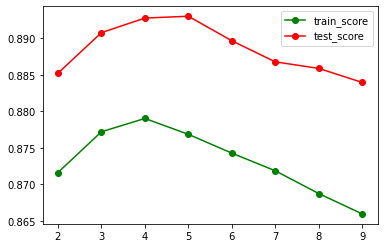

In [144]:
plt.plot(range(2,10),train_score,label="train_score",color="green",marker="o")
plt.plot(range(2,10),test_score,label="test_score",color="red",marker="o")
plt.legend()
plt.show()

In [145]:
knn=KNeighborsClassifier(n_neighbors=4,n_jobs=-1)
knn.fit(x_train,y_train)

train_score=cross_val_score(knn,x_train,y_train,scoring="roc_auc_ovr").mean()
test_score=roc_auc_score(y_test,knn.predict_proba(x_test), multi_class="ovr")

print("THE TRAINING SCORE :",train_score)
print("THE TESTING SCORE  :",test_score)

THE TRAINING SCORE : 0.8790142448979591
THE TESTING SCORE  : 0.8927409333333334


In [146]:
model_scores["KNN"]=(train_score,test_score)

# GRADIENT BOOSTING CLASSIFIER

In [147]:
gb=GradientBoostingClassifier(n_estimators=100)

In [148]:
gb.fit(x_train,y_train)

GradientBoostingClassifier()

In [149]:
train_score=roc_auc_score(y_train,gb.predict_proba(x_train), multi_class="ovr")
test_score=roc_auc_score(y_test,gb.predict_proba(x_test), multi_class="ovr")

print("THE TRAINING SCORE :",train_score)
print("THE TESTING SCORE  :",test_score)

THE TRAINING SCORE : 0.9826408979591836
THE TESTING SCORE  : 0.9252442666666667


In [150]:
model_scores["GRADIENTBOOST"]=(train_score,test_score)

In [159]:
x_values=[]
y_values=[]
names=[]
for i in model_scores.keys():
    x_values.append(model_scores[i][0])
    y_values.append(abs(model_scores[i][0]-model_scores[i][1]))
    names.append(i)

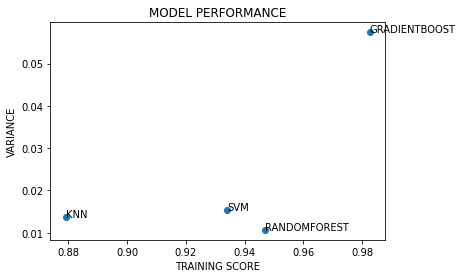

In [160]:
plt.scatter(x_values,y_values)
plt.ylabel("VARIANCE")
plt.xlabel("TRAINING SCORE")
plt.title("MODEL PERFORMANCE")
for i in range(len(names)):
    plt.text(x_values[i],y_values[i],names[i])
plt.show() 

# BEST CLASSIFIER

In [ ]:
#  GRADIENTBOOST SUITS WELL WITH OUR DATASETS

In [161]:
# SAVING OUR MODEL

filename="best_for_age_clf.pkl"
joblib.dump(gb, filename)

['best_for_age_clf.pkl']

# CONSIDERING  GENDER AS TARGET VARIABLE

In [74]:
x=final_data.copy()
y=df["gender"].copy()

In [75]:
y.unique()

array([1., 0., 3.])

In [76]:
y.value_counts()

1.0    5406
0.0    4373
3.0       1
Name: gender, dtype: int64

In [77]:
y[y==3.0].index

Int64Index([7883], dtype='int64')

In [78]:
y.drop([7883],axis=0,inplace=True)

In [80]:
x.drop([7883],axis=0,inplace=True)

In [81]:
y.value_counts()

1.0    5406
0.0    4373
Name: gender, dtype: int64

In [82]:
x.shape

(9779, 1024)

In [83]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=5, stratify=y)

# MODEL

In [91]:
model_scores={}

# RANDOMFOREST CLASSIFIER

In [84]:
model_params={
    "randomforest":{"model":RandomForestClassifier(),
           "params":{"n_estimators":[50,100,150,200,250,300],
                       "min_samples_split":[5,10,15,20]}
          }
}

for keyss,valuess in model_params.items():
    clf=GridSearchCV(valuess["model"],valuess["params"],cv=5,n_jobs=-1,scoring="roc_auc")
    clf.fit(x_train,y_train)

In [85]:
pd.DataFrame(clf.cv_results_,columns=["params","mean_test_score","rank_test_score"]).sort_values("rank_test_score")[:7]

,params,mean_test_score,rank_test_score
11,"{'min_samples_split': 10, 'n_estimators': 300}",0.826653,1
5,"{'min_samples_split': 5, 'n_estimators': 300}",0.826082,2
4,"{'min_samples_split': 5, 'n_estimators': 250}",0.826079,3
10,"{'min_samples_split': 10, 'n_estimators': 250}",0.824568,4
17,"{'min_samples_split': 15, 'n_estimators': 300}",0.824446,5
9,"{'min_samples_split': 10, 'n_estimators': 200}",0.824129,6
16,"{'min_samples_split': 15, 'n_estimators': 250}",0.824024,7


In [88]:
rf_gender=RandomForestClassifier(n_estimators=300,min_samples_split=10)
rf_gender.fit(x_train,y_train)

RandomForestClassifier(min_samples_split=10, n_estimators=300)

In [89]:
train_score=cross_val_score(rf_gender,x_train,y_train,scoring="roc_auc",cv=5).mean()
# train_score=roc_auc_score(y_train,rf_gender.predict_proba(x_train)[:,1])
test_score=roc_auc_score(y_test,rf_gender.predict_proba(x_test)[:,1])
print("TRAINING SCORE   :",train_score)
print("TESTING SCORE   :",test_score)

TRAINING SCORE   : 0.8241184005882187
TESTING SCORE   : 0.8385753435986887


In [92]:
model_scores["RANDOMFOREST"]=(train_score,test_score)

# KNN CLASSIFIER

In [93]:
train_score=[]
test_score=[]
for i in range(2,10):
    knn=KNeighborsClassifier(n_neighbors=i,n_jobs=-1)
    knn.fit(x_train,y_train)
    train_score.append(cross_val_score(knn,x_train,y_train,scoring="roc_auc").mean())
    test_score.append(knn.score(x_test,y_test))

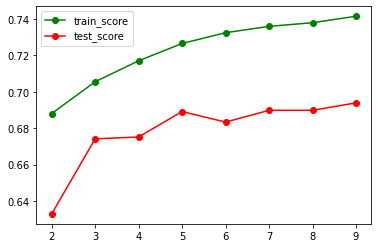

In [94]:
plt.plot(range(2,10),train_score,label="train_score",color="green",marker="o")
plt.plot(range(2,10),test_score,label="test_score",color="red",marker="o")
plt.legend()
plt.show()

In [95]:
knn_gender=KNeighborsClassifier(n_neighbors=3,n_jobs=-1)
knn_gender.fit(x_train,y_train)

KNeighborsClassifier(n_jobs=-1, n_neighbors=3)

In [96]:
train_score=cross_val_score(knn_gender,x_train,y_train,scoring="roc_auc",cv=5).mean()
test_score=roc_auc_score(y_test,knn_gender.predict_proba(x_test)[:,1])
print("TRAINING SCORE   :",train_score)
print("TESTING SCORE   :",test_score)

TRAINING SCORE   : 0.705547702698547
TESTING SCORE   : 0.718850560885387


In [97]:
model_scores["KNN"]=(train_score,test_score)

# GRADIENT BOOSTING CLASSIFIER

In [100]:
gb_gender=GradientBoostingClassifier(n_estimators=100)
gb_gender.fit(x_train,y_train)

GradientBoostingClassifier()

In [101]:
train_score=cross_val_score(gb_gender,x_train,y_train,scoring="roc_auc",cv=5).mean()
test_score=roc_auc_score(y_test,gb_gender.predict_proba(x_test)[:,1])
print("TRAINING SCORE   :",train_score)
print("TESTING SCORE   :",test_score)

TRAINING SCORE   : 0.8434232182795824
TESTING SCORE   : 0.8536566569426484


In [102]:
model_scores["GRADIENTBOOST"]=(train_score,test_score)

In [103]:
x_values=[]
y_values=[]
names=[]
for i in model_scores.keys():
    x_values.append(model_scores[i][0])
    y_values.append(abs(model_scores[i][0]-model_scores[i][1]))
    names.append(i)

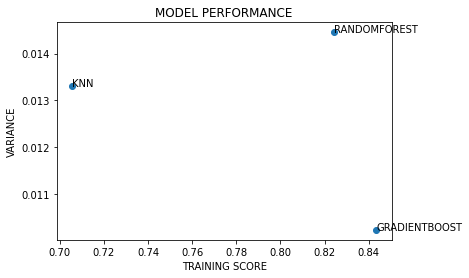

In [104]:
plt.scatter(x_values,y_values)
plt.ylabel("VARIANCE")
plt.xlabel("TRAINING SCORE")
plt.title("MODEL PERFORMANCE")
for i in range(len(names)):
    plt.text(x_values[i],y_values[i],names[i])
plt.show()    

# SAVING OUR MODEL

In [105]:
filename="best_for_gender_clf.pkl"
joblib.dump(gb_gender, filename)

['best_for_gender_clf.pkl']

# LOADING OUR MODEL

In [5]:
gender_predictor=joblib.load("G:/jupyter notebook/best_for_gender_clf.pkl")
age_predictor=joblib.load("G:/jupyter notebook/best_for_age_clf.pkl")

In [6]:
# FACE DETECTOR

In [7]:
face_cascade = cv.CascadeClassifier('C:/Users/Hariharan.M/AppData/Roaming/Python/Python310/site-packages/cv2/data/haarcascade_frontalface_default.xml')


# BY APPLYING FILEPATH

In [26]:
def age_sex_predictor(string):
    dic={0:"0-20",1:"20-40",2:"40-60",3:"60-80",4:"80-100",5:"100-120"}
    frame=cv.imread(string)
    gray=cv.cvtColor(frame,cv.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.1, 2)
    try:
        x,y,w,h=faces[0]
    except:
        print("cannot find you face")
        return  
    rectangle_img = cv.rectangle(gray,(x,y),(x+w,y+h),(255,0,0),2) 
    face_img=frame[y:y+h,x:x+w]
    gray=cv.cvtColor(face_img,cv.COLOR_BGR2GRAY)
    gray=cv.resize(gray,(32,32))
    reshape_face=gray.reshape(1,32*32)
    arr = reshape_face.astype('float32')
    arr /= 255
    
    gender_predict=gender_predictor.predict(arr)[0]
    gender_predict="MALE" if gender_predict==0.0 else "FEMALE"
    
    age_predict=age_predictor.predict(arr)[0]
    age_predict=dic[age_predict]
    print("hey!,there you are ",gender_predict,"your age is ",age_predict)
    print()
    print("GUESS THIS IS YOUR FACE!!!")
    plt.imshow(face_img)         

hey!,there you are  MALE your age is  0-20

GUESS THIS IS YOUR FACE!!!


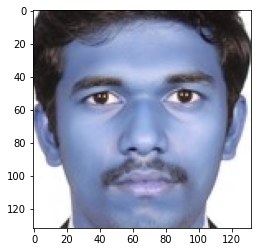

In [27]:
# give the file path as string
string="C:/Users/Hariharan.M/Pictures/hari.jpg" #please give the file path    
age_sex_predictor(string)

# APPLYING OUR MODEL ON PHOTO TO DETECT OUR AGE AND GENDER

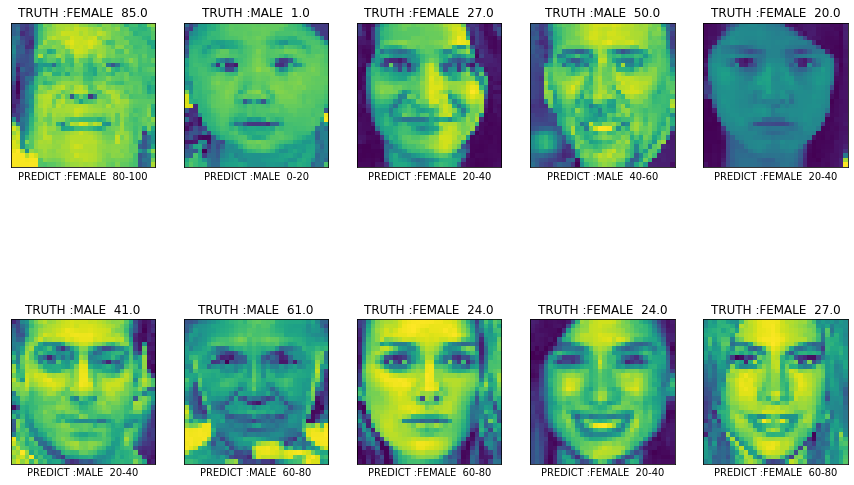

In [23]:
dic={0:"0-20",1:"20-40",2:"40-60",3:"60-80",4:"80-100",5:"100-120"}

plt.figure(figsize=(15,10))
j=0
for i in list(df["norm_age"].sample(10).index):
    ax=plt.subplot(2,5,j+1)
    
    true_gender="FEMALE" if df.iloc[i]["gender"] ==1.0  else "MALE"
   
    age=age_predictor.predict(np.array(final_data.loc[i]).reshape((32,32)).reshape(1,32*32))[0]
    
    predict_gender=gender_predictor.predict(np.array(final_data.loc[i]).reshape((32,32)).reshape(1,32*32))[0]
    predict_gender="MALE" if predict_gender==0.0 else "FEMALE"
    
    
    plt.imshow(np.array(final_data.loc[i]).reshape((32,32)))
    
    plt.title("TRUTH :"+ str(true_gender)+"  "+str(df.iloc[i]["age"]))
    plt.xlabel(f"PREDICT :"+str(predict_gender)+"  "+str(dic[age]))
    plt.xticks([])
    plt.yticks([])
    j+=1
plt.show()

# USING WEBCAM 

In [8]:
dic={0:"0-20",1:"20-40",2:"40-60",3:"60-80",4:"80-100",5:"100-120"}
cap=cv.VideoCapture(0)
i=0
while True:
    ret,frame=cap.read()
    gray=cv.cvtColor(frame,cv.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 2)
    try:
        x,y,w,h=faces[0]
    except:
        cv.imshow("AGE AND GENDER DETECTOR",frame)
        if cv.waitKey(1)==ord("q"):
            break
        continue
    rectangle_img = cv.rectangle(frame,(x,y),(x+w,y+h),(255,0,0),2) 
    face_img=frame[y:y+h,x:x+w]
    gray=cv.cvtColor(face_img,cv.COLOR_BGR2GRAY)
    gray=cv.resize(gray,(32,32))
    reshape_face=gray.reshape(1,32*32)
    arr = reshape_face.astype('float32')
    arr /= 255
    your_gender=gender_predictor.predict(arr)[0]
    your_gender="MALE" if your_gender==0.0 else "FEMALE"
    your_age=age_predictor.predict(arr)[0]
    your_age=dic[your_age]
    
    txt_img=cv.putText( rectangle_img,f"you are {your_gender},age around {your_age}",(x,y),cv.FONT_HERSHEY_PLAIN,1.0,(0,255,0),thickness=2)
    
#     if gender=="[0.]":
#         txt_img=cv.putText( rectangle_img,f"you are male {dic[your_age]}",(x,y),cv.FONT_HERSHEY_PLAIN,1.0,(0,255,0),thickness=2)
#     else:
#         txt_img=cv.putText( rectangle_img,f"you are female {dic[your_age]}",(x,y),cv.FONT_HERSHEY_PLAIN,1.0,(0,255,0),thickness=2)
    cv.imshow("AGE AND GENDER DETECTOR", txt_img)
    if cv.waitKey(1)==ord("q"):
        break
cap.release() 
cv.destroyAllWindows()


# ---------------------------------------------------THE END-------------------------------------------------------------